In [2]:
import tensorflow as tf
print(tf.__version__)


physical_device = tf.config.experimental.list_physical_devices("GPU")
if len(physical_device) > 0:
    tf.config.experimental.set_memory_growth(physical_device[0], True)
    
    
tf.config.experimental_run_functions_eagerly(True)

2.2.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

In [5]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 12,883
Trainable params: 12,883
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [8]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(lr=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae])

In [10]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [15]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

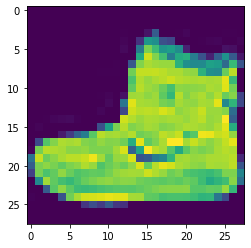

labels: Ankle boot


In [16]:
# Display one of the images
i =0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"labels: {labels[train_labels[i]]}")

#### Fit the model

In [18]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=20, batch_size=256)


Epoch 1/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3383 - sparse_categorical_accuracy: 0.8791 - mean_absolute_error: 4.4200
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3191 - sparse_categorical_accuracy: 0.8857 - mean_absolute_error: 4.4200
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3073 - sparse_categorical_accuracy: 0.8904 - mean_absolute_error: 4.4200
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.2964 - sparse_categorical_accuracy: 0.8936 - mean_absolute_error: 4.4200
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.2879 - sparse_categorical_accuracy: 0.8967 - mean_absolute_error: 4.4200
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.2813 - sparse_categorical_accuracy: 0.8989 - mean_absolute_error: 4.4200
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.2779 - sparse_categorical_accu

#### Plot training history

In [19]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.338350,0.879133,4.420000
1,0.319093,0.885750,4.419999
2,0.307271,0.890417,4.420001
3,0.296414,0.893567,4.419997
4,0.287866,0.896733,4.420000


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'Epochs')]

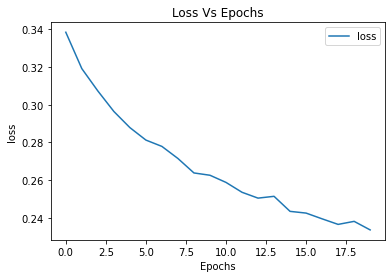

In [25]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss Vs Epochs')
loss_plot.set(xlabel='Epochs', ylabel='loss')

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Epochs')]

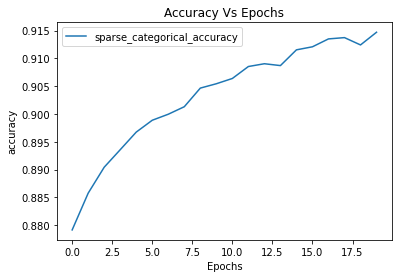

In [27]:
# Make a plot for the accuracy

loss_plot = df.plot(y='sparse_categorical_accuracy', title='Accuracy Vs Epochs')
loss_plot.set(xlabel='Epochs', ylabel='accuracy')

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'Epochs')]

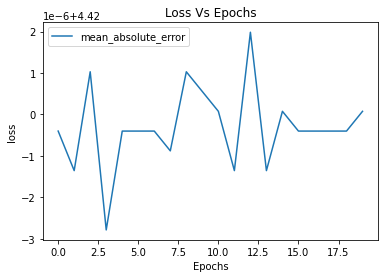

In [28]:
# Make a plot for the additional metric
loss_plot = df.plot(y='mean_absolute_error', title='Loss Vs Epochs')
loss_plot.set(xlabel='Epochs', ylabel='loss')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [29]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [31]:
# Evaluate the model

test_loss, test_accuracy , test_mae = model.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3079 - sparse_categorical_accuracy: 0.8921 - mean_absolute_error: 4.4200


#### Make predictions from the model

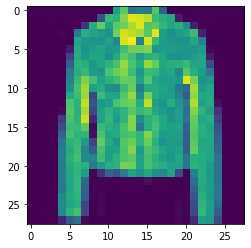

Label: Coat


In [34]:
# Choose a random test image

random_inx = 10 #np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [36]:
# Get the model predictions
prediction = model.predict(test_image[np.newaxis, ..., np.newaxis])
print('Model Prediction ', labels[np.argmax(prediction)])

Model Prediction  Coat
